# Usernames that are Dinosaur like

In [1]:
%matplotlib inline
import time
import pylab
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')

from pysurvey.plot import setup_sns as setup
from pysurvey.plot import density, icolorbar, text, legend, outline

In [2]:
people = pd.read_csv('/Users/ajmendez/data/okcupid/random_v4.csv')

/Users/ajmendez/.local/canopy/User/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dino = people[people['hasdino']]
notdino =people[~people['hasdino']]
print len(dino), len(notdino)

2327 334826


/Users/ajmendez/.local/canopy/User/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


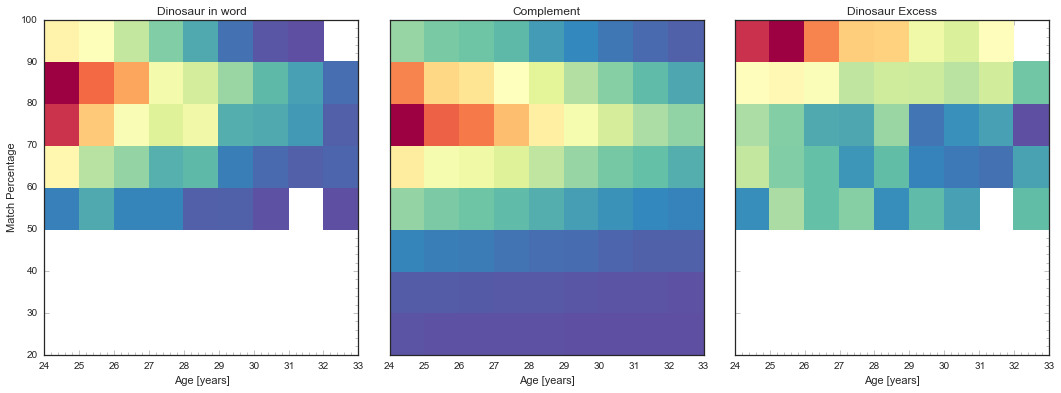

In [4]:
def setup_plot(**kwargs):
    return setup(xlabel='Age [years]', ylabel='Match Percentage', **kwargs)

def make_bins(data):
    x,y = np.arange(24,34,1), np.arange(20,101,10)
    X,Y = np.meshgrid(x,y)
    Z = np.histogram2d(data['age'], data['match'], bins=(x,y))[0]
    return X, Y, np.ma.MaskedArray(Z, Z<10).T

X,Y,Z_dino = make_bins(dino)
_,_,Z_notdino = make_bins(notdino)

setup_plot(figsize=(18,6), subplt=(1,3,1), title='Dinosaur in word')
pcm = pylab.pcolormesh(X,Y,Z_dino, cmap=pylab.cm.Spectral_r)

setup_plot(subplt=(1,3,2), yticks=False, title='Complement')
pcm = pylab.pcolormesh(X,Y,Z_notdino, cmap=pylab.cm.Spectral_r)

setup_plot(subplt=(1,3,3), yticks=False, title='Dinosaur Excess')
pcm = pylab.pcolormesh(X,Y,Z_dino/Z_notdino, cmap=pylab.cm.Spectral_r)

